Test VAE model on random frame of random file in `record`

In [1]:
import numpy as np
import os
import json
import tensorflow as tf
import random
from vae.vae import reset_graph, ConvVAE

In [2]:
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, edgeitems=6, linewidth=100, suppress=True)

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1" # disable GPU

DATA_DIR = "record"
model_path_name = "tf_vae"
# NOTE: make sure you copy the vae model you want to test from tf_vae/vae.json to tf_models/vae.json

z_size=64

In [4]:
filelist = os.listdir(DATA_DIR)

In [5]:
vae = ConvVAE(z_size=z_size,
              batch_size=1,
              is_training=False,
              reuse=False,
              gpu_mode=False)

vae.load_json(os.path.join(model_path_name, 'vae.json'))

INFO:tensorflow:Model using cpu.
Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use keras.layers.conv2d_transpose instead.


In [26]:
obs = np.load(os.path.join(DATA_DIR, random.choice(filelist)))["obs"]
obs = obs.astype(np.float32)/255.0

In [27]:
frame = random.choice(obs).reshape(1, 64, 64, 3)

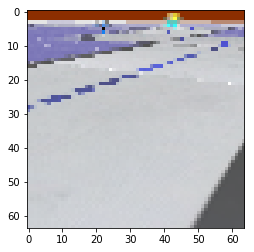

In [28]:
# show recorded frame that will be fed into the input of VAE
plt.imshow(frame[0])
plt.show()

In [29]:
batch_z = vae.encode(frame)
print(batch_z[0]) # print out sampled z
reconstruct = vae.decode(batch_z)

[ 2.1324 -0.5586  0.0371 -0.0295  0.2506  0.5618  0.8066 -0.794   0.8761  0.115   0.9295 -1.0073
  1.6953 -0.7977 -0.5745  0.4808  0.8647  0.1682  0.5813  0.7427  1.5574 -0.2792 -0.0815 -0.2376
 -1.3011  0.4008  0.5932  0.4778 -1.1618 -1.3546 -0.9748  1.3263  0.8399 -0.7165 -0.4769  1.44
 -0.2426  0.4576  1.4449  0.5405 -0.9688  1.1459  0.2214  0.5053 -1.2189 -0.101   0.0642 -1.8465
 -1.9601 -0.3002 -0.1876  0.8852  0.1406 -0.7185  1.4726 -1.924   0.0509 -1.1625  0.6519  0.1435
 -0.6728 -1.2128 -0.848   0.7496]


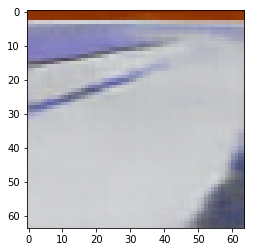

In [30]:
# show reconstruction
plt.imshow(reconstruct[0])
plt.show()